<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Bagging_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [3]:
class BaggingRegressor:
    def __init__(self, n_estimators=10, sample_size=0.8, max_depth=None):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.max_depth = max_depth
        self.models = []
        self.subsets = []

    def fit(self, X, y):
        self.models = []
        self.subsets = []
        n_samples = int(self.sample_size * len(X))

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), n_samples, replace=True)
            X_subset, y_subset = X[indices], y[indices]
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X_subset, y_subset)
            self.models.append(model)
            self.subsets.append(indices)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0)

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)


        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print("Training Metrics:")
        print(f"MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
        print("\nTesting Metrics:")
        print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        X_pca = pca.transform(X)

        xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                            np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
        Z = bagging_reg.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        scatter = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', edgecolor='k')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Decision Boundary of Bagging Regressor")
        plt.colorbar(scatter.collections[0])
        plt.show()

        # return train_mae, test_mae, train_mse, test_mse, train_rmse, test_rmse, train_r2, test_r2



Training Metrics:
MAE: 254.0482, MSE: 105866.4862, RMSE: 325.3713, R²: 0.8372

Testing Metrics:
MAE: 237.6813, MSE: 101878.3817, RMSE: 319.1839, R²: 0.8383


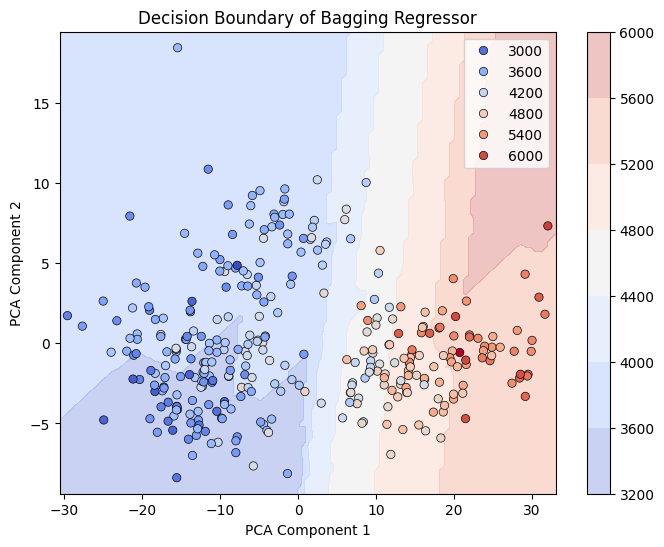

In [4]:
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['body_mass_g']).select_dtypes(include=[np.number]).values  # Features
y = data['body_mass_g'].values  # Target (Continuous)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train and Evaluate Bagging Regressor
bagging_reg = BaggingRegressor(n_estimators=10, sample_size=0.8, max_depth=3)
bagging_reg.fit(X_train, y_train)
bagging_reg.evaluate(X_train, y_train, X_test, y_test)

